In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Data science\Data sample\Movie dataset\movie_ratings.csv',index_col=0)
df

,movie,year,imdb,votes,popularity
0,Gladiator,2000,8.5,1187559,25.884
1,Memento,2000,8.5,1014199,60.110
2,Snatch,2000,8.3,707162,62.784
3,Requiem for a Dream,2000,8.3,688394,28.316
4,X-Men,2000,7.4,526411,38.661
...,...,...,...,...,...
1795,Transformers: The Last Knight,2017,5.2,113918,6.740
1796,Mindhunter,2017,8.5,111213,9.838
1797,The Lego Batman Movie,2017,7.3,111193,6.512
1798,The Handmaid's Tale,2017,8.6,106329,6.385


In [3]:
mov=pd.isna(df)
mov.sum()

movie         0
year          0
imdb          0
votes         0
popularity    0
dtype: int64

In [4]:
df.interpolate(inplace=True)

In [5]:
df

,movie,year,imdb,votes,popularity
0,Gladiator,2000,8.5,1187559,25.884
1,Memento,2000,8.5,1014199,60.110
2,Snatch,2000,8.3,707162,62.784
3,Requiem for a Dream,2000,8.3,688394,28.316
4,X-Men,2000,7.4,526411,38.661
...,...,...,...,...,...
1795,Transformers: The Last Knight,2017,5.2,113918,6.740
1796,Mindhunter,2017,8.5,111213,9.838
1797,The Lego Batman Movie,2017,7.3,111193,6.512
1798,The Handmaid's Tale,2017,8.6,106329,6.385


In [6]:
df['year'].value_counts()

year
2011    102
2007    102
2000    100
2001    100
2015    100
2014    100
2013    100
2012    100
2010    100
2009    100
2008    100
2005    100
2004    100
2003    100
2002    100
2017    100
2006     98
2016     98
Name: count, dtype: int64

<Axes: xlabel='popularity', ylabel='votes'>

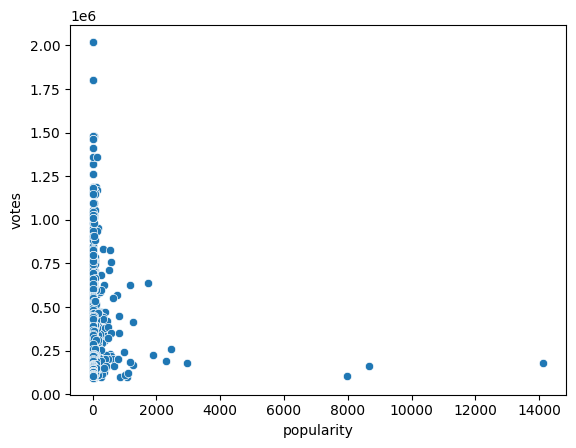

In [9]:
sns.scatterplot(x='popularity',y='votes',data=df)

In [10]:
final=df.drop(['movie'],axis='columns')
final

,year,imdb,votes,popularity
0,2000,8.5,1187559,25.884
1,2000,8.5,1014199,60.110
2,2000,8.3,707162,62.784
3,2000,8.3,688394,28.316
4,2000,7.4,526411,38.661
...,...,...,...,...
1795,2017,5.2,113918,6.740
1796,2017,8.5,111213,9.838
1797,2017,7.3,111193,6.512
1798,2017,8.6,106329,6.385


In [11]:
X=final.drop(['imdb'],axis='columns')
y=final['imdb']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.01, random_state=20)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
acc=model.score(X_test,y_test)
print(f'Model Accuracy :{acc*100:.2f}')

Model Accuracy :59.11


In [29]:
model.predict(X_test)

array([7.01705682, 7.34187461, 7.10645383, ..., 6.93578819, 7.11008683,
       7.2331935 ])

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume you have your features X and labels y
# X, y = ...

best_r2_score = -1.0
best_random_state = 0
best_test_size = 0.0

for random_state in range(1, 21):  # Loop through different random_state values
    for test_size in np.arange(0.1, 1.0, 0.1):  # Loop through different test_size values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model = LinearRegression()  # Linear regression model
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            best_test_size = test_size

print(f"Best R-squared Score: {best_r2_score:.2f}")
print(f"Best Random State: {best_random_state}")
print(f"Best Test Size: {best_test_size:.2f}")


Best R-squared Score: 0.30
Best Random State: 20
Best Test Size: 0.10
